# Import library

In [264]:
import pandas as pd
import numpy as np

import requests
'''from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager'''
from time import sleep
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings('ignore')
import pprint

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 100, 'display.max_row', 1000)

# Exploring the data and miner Cleaning

In [265]:
df = pd.read_csv('updated.csv')
print(df.shape)
df.sample(5)


(583, 40)


,Unnamed: 0,Unnamed: 1,Model,Family,Line,Platform,Product ID Tray,Product ID Boxed,Product ID MPK,Launch Date,# of CPU Cores,# of Threads,Graphics Core Count,Base Clock,Max. Boost Clock ¹ ²,All Core Boost Speed,L1 Cache,L2 Cache,L3 Cache,1kU Pricing,Unlocked for Overclocking,Processor Technology for CPU Cores,CPU Socket,Socket Count,PCI Express® Version,Thermal Solution PIB,Thermal Solution MPK,Default TDP,AMD Configurable TDP (cTDP),Max. Operating Temperature (Tjmax),*OS Support,System Memory Specification,System Memory Type,Memory Channels,Per Socket Mem BW,Graphics Frequency,GPU Base,Graphics Model,Supported Technologies,Workload Affinity
23,NaN,on,AMD Ryzen™ 7 6800HS,AMD Ryzen™ Processors,AMD Ryzen™ 7 Mobile Processors with Radeon™ Gr...,Laptop,FP7:100-000000545 FP7r7:\t100-000000561,NaN,NaN,NaN,8.0,16.0,12.0,3.2GHz,Up to 4.7GHz,NaN,512KB,4MB,16MB,NaN,No,TSMC 6nm FinFET,FP7,NaN,PCIe® 4.0,NaN,NaN,35W,NaN,95°C,"Windows 11 - 64-Bit Edition, Windows 10 - 64-B...",NaN,DDR5,2.0,NaN,2200 MHz,NaN,AMD Radeon™ 680M,NaN,NaN
535,NaN,on,6212,AMD Opteron™,AMD Opteron™ 6200 Series Processor,Server,OS6212WKT8GGU,NaN,NaN,NaN,8.0,8.0,NaN,2.6GHz,Up to 3.2GHz,NaN,384KB,8MB,16MB,NaN,No,32nm,G34,NaN,NaN,NaN,NaN,115W,NaN,71.70°C,NaN,Up to 2000MHz,DDR3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,NaN,on,A10-8700P with Radeon™ R6 Graphics,AMD A-Series Processors,AMD A10-Series APU for AIOs,All-in-One,AM870PAAY43KAD,NaN,NaN,NaN,4.0,4.0,6.0,1.8GHz,Up to 3.2GHz,NaN,NaN,2MB,NaN,NaN,No,28nm,FP4,NaN,NaN,NaN,NaN,NaN,NaN,90°C,NaN,Up to 2133MHz,DDR3,2.0,NaN,800 MHz,NaN,AMD Radeon™ R6 Graphics,"Virtualization, AES, Catalyst Software, AMD Fr...",NaN
333,NaN,on,A8-7600 with Radeon™ R7 Series,AMD A-Series Processors,AMD A8-Series APU for Desktops,Boxed Processor,AD7600YBI44JA,AD7600YBJABOX,NaN,NaN,4.0,4.0,6.0,3.1GHz,Up to 3.8GHz,NaN,256KB,4MB,NaN,NaN,No,28nm,FM2+,NaN,NaN,NaN,NaN,65W,45W/65WW,71.30°C,NaN,Up to 2133MHz,DDR3,2.0,NaN,720 MHz,NaN,AMD Radeon™ R7 Graphics,"Virtualization, AES, Catalyst Software, AMD Ra...",NaN
191,NaN,on,AMD Ryzen™ 5 PRO 3350GE,AMD Ryzen™ PRO Processors,AMD Ryzen™ 5 PRO 3000 Series Desktop Processors,Desktop,YD335BC6M4MFH,NaN,NaN,7/21/2020,4.0,4.0,10.0,3.3GHz,Up to 3.9GHz,NaN,384KB,2MB,4MB,NaN,No,12nm,NaN,NaN,PCIe® 3.0,NaN,NaN,35W,NaN,95°C,"Windows 10 - 64-Bit Edition, RHEL x86 64-Bit, ...",Up to 2933MHz,DDR4,2.0,NaN,1200 MHz,NaN,Radeon™ Graphics,"AMD Memory Guard, AMD GuardMI Technology, DASH...",NaN


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          0 non-null      float64
 1   Unnamed: 1                          583 non-null    object 
 2   Model                               583 non-null    object 
 3   Family                              583 non-null    object 
 4   Line                                583 non-null    object 
 5   Platform                            583 non-null    object 
 6   Product ID Tray                     544 non-null    object 
 7   Product ID Boxed                    222 non-null    object 
 8   Product ID MPK                      59 non-null     object 
 9   Launch Date                         241 non-null    object 
 10  # of CPU Cores                      579 non-null    float64
 11  # of Threads                        524 non-n

In [294]:
df.rename(columns = {'Base_Clock' : 'Base_Clock_GHz', 'Max._Boost_Clock_¹_²' : 'Boost_Clock_GHz', 
                     '#_of_CPU_Cores' : 'CPU_Core', '#_of_Threads' : 'Threads',
                     'Processor_Technology_for_CPU_Cores' : 'Chip_lithography','PCI_Express®_Version' : 'PCI_Express_Version',
                     'Max. Operating Temperature (Tjmax)' : 'Maximum_core_temperature', }, inplace = True)


df.columns = [sub.replace(' ', '_') for sub in df.columns]
df.Model = [i.replace('™', '') for i in df.Model]
df.Family = [i.replace('™', '') for i in df.Family]

#change data type
df = df.astype({"Graphics_Model":'str'})
df.Graphics_Model = [i.replace('™', '') for i in df.Graphics_Model]

#### Dropped useless features

In [268]:

df.drop(['Unnamed:_0', 'Unnamed:_1', 'Product_ID_Tray', 'Product_ID_Boxed', 'Product_ID_MPK',
         'Line', 'Graphics_Core_Count', 'All_Core_Boost_Speed', 'Socket_Count', '1kU_Pricing',
         'Thermal_Solution_PIB', 'Thermal_Solution_MPK', '*OS_Support', 'Memory_Channels', 'Per_Socket_Mem_BW', 'Graphics_Frequency', 'GPU_Base',
         'Supported_Technologies', 'Workload_Affinity', 'AMD_Configurable_TDP_(cTDP)', 'System_Memory_Specification'], axis=1, inplace = True)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               583 non-null    object 
 1   Family                              583 non-null    object 
 2   Platform                            583 non-null    object 
 3   Launch_Date                         241 non-null    object 
 4   #_of_CPU_Cores                      579 non-null    float64
 5   #_of_Threads                        524 non-null    float64
 6   Base_Clock                          583 non-null    object 
 7   Max._Boost_Clock_¹_²                503 non-null    object 
 8   L1_Cache                            327 non-null    object 
 9   L2_Cache                            518 non-null    object 
 10  L3_Cache                            377 non-null    object 
 11  Unlocked_for_Overclocking           489 non-n

# Handeling the Missing Values

In [270]:
df.isnull().sum()

Model                                   0
Family                                  0
Platform                                0
Launch_Date                           342
#_of_CPU_Cores                          4
#_of_Threads                           59
Base_Clock                              0
Max._Boost_Clock_¹_²                   80
L1_Cache                              256
L2_Cache                               65
L3_Cache                              206
Unlocked_for_Overclocking              94
Processor_Technology_for_CPU_Cores    102
CPU_Socket                             28
PCI_Express®_Version                  245
Default_TDP                            19
Maximum_core_temperature              136
System_Memory_Type                     35
Graphics_Model                          0
dtype: int64

In [271]:
df.Model

0                      AMD Ryzen Threadripper PRO 5995WX
1                      AMD Ryzen Threadripper PRO 5975WX
2                      AMD Ryzen Threadripper PRO 5965WX
3                      AMD Ryzen Threadripper PRO 5955WX
4                      AMD Ryzen Threadripper PRO 5945WX
5                                      AMD Ryzen 9 5950X
6                                      AMD Ryzen 9 5900X
7                                    AMD Ryzen 7 5800X3D
8                            AMD Ryzen 9 5900 (OEM Only)
9                                      AMD Ryzen 7 5800X
10                           AMD Ryzen 7 5800 (OEM Only)
11                                     AMD Ryzen 5 5600X
12                                     AMD Ryzen 7 5700X
13                                    AMD Ryzen 9 6980HX
14                                    AMD Ryzen 9 3900XT
15                                      AMD Ryzen 5 5600
16                                    AMD Ryzen 9 6980HS
17                             

In [272]:
for i in range(len(model)):
  x=df["Model"][i].partition("with Radeon")
  df["Model"][i]=x[0]

model=df.Model
model = [i.replace('AMD', '') for i in model] 
model = [i.replace('(OEM Only) ', '') for i in model] 
model = [i.replace('\u200b', '') for i in model]
model = [i.replace(' APU', '') for i in model]
model = [i.replace(' Processor', '') for i in model]
model = [i.replace('(Only)', '') for i in model]
df.sample(5)




In [273]:
df.Model

0                 AMD Ryzen Threadripper PRO 5995WX
1                 AMD Ryzen Threadripper PRO 5975WX
2                 AMD Ryzen Threadripper PRO 5965WX
3                 AMD Ryzen Threadripper PRO 5955WX
4                 AMD Ryzen Threadripper PRO 5945WX
5                                 AMD Ryzen 9 5950X
6                                 AMD Ryzen 9 5900X
7                               AMD Ryzen 7 5800X3D
8                       AMD Ryzen 9 5900 (OEM Only)
9                                 AMD Ryzen 7 5800X
10                      AMD Ryzen 7 5800 (OEM Only)
11                                AMD Ryzen 5 5600X
12                                AMD Ryzen 7 5700X
13                               AMD Ryzen 9 6980HX
14                               AMD Ryzen 9 3900XT
15                                 AMD Ryzen 5 5600
16                               AMD Ryzen 9 6980HS
17                               AMD Ryzen 9 6900HX
18                                 AMD Ryzen 5 5500
19          

In [274]:
# df.isnull().sum() 
# df.sample(5)

## Scrapping the value

### Preparing the data for scraping

In [275]:
'''
# list_of_things_to_remove = ['AMD ', '\u200b', ' (OEM Only)', ' Processor', ' with Radeon RX Vega 11 Graphics', 
#                             ' Microsoft Surface® Edition',  'with Radeon Vega 8 Graphics', ' Mobile with Radeon Vega 3 Graphics', 
#                             ' with Radeon Vega 11 Graphics', '7th Gen ', '6th Gen ', ' APU', ' with Radeon R7 Graphics and Wraith cooler', 
#                             ' with Radeon R7 Graphics and Near Silent Thermal Solution', 
#                             ' with Radeon HD 8670D', ' with Radeon HD 8650D', ' with Radeon HD 8570D', 
#                             ' with Radeon HD 8550D', ' with Radeon HD 8470D', ' with Radeon HD 8400', 
#                             ' with Radeon HD 8370D', ' with Radeon HD 8330', ' with Radeon HD 8450G', 
#                             ' with Radeon HD 8280', ' with Radeon HD 8240', ' with Radeon HD 8210', 
#                             ' with Radeon R4 Graphics', ' with Radeon R6 Graphics', ' with Radeon R5 Graphics', 
#                             ' with Radeon R3 Graphics', ' with Radeon R7 Graphics', ' with Radeon R7 Graphics', 
#                             ' with Radeon R2 Graphics', ' with Radeon R2 Graphics', ' with Radeon R5 Series', 
#                             ' with Radeon R3 Series',' with Radeon R7 Series', ' with Wraith cooler', 
#                             ' with Near Silent Thermal Solution', 
#                             ]

# # # list_of_things_to_remove = pd.DataFrame(list_of_things_to_remove)
# # model = model.values.tolist()'''

"\n# list_of_things_to_remove = ['AMD ', '\u200b', ' (OEM Only)', ' Processor', ' with Radeon RX Vega 11 Graphics', \n#                             ' Microsoft Surface® Edition',  'with Radeon Vega 8 Graphics', ' Mobile with Radeon Vega 3 Graphics', \n#                             ' with Radeon Vega 11 Graphics', '7th Gen ', '6th Gen ', ' APU', ' with Radeon R7 Graphics and Wraith cooler', \n#                             ' with Radeon R7 Graphics and Near Silent Thermal Solution', \n#                             ' with Radeon HD 8670D', ' with Radeon HD 8650D', ' with Radeon HD 8570D', \n#                             ' with Radeon HD 8550D', ' with Radeon HD 8470D', ' with Radeon HD 8400', \n#                             ' with Radeon HD 8370D', ' with Radeon HD 8330', ' with Radeon HD 8450G', \n#                             ' with Radeon HD 8280', ' with Radeon HD 8240', ' with Radeon HD 8210', \n#                             ' with Radeon R4 Graphics', ' with Radeon R6 Graphics', ' w

In [276]:
'''# def rplc(lst1, lst2):
#     for j in lst1:
#         final_lst = [i.replace(j, '') for i in lst2]
#     return final_lst '''

"# def rplc(lst1, lst2):\n#     for j in lst1:\n#         final_lst = [i.replace(j, '') for i in lst2]\n#     return final_lst "

In [277]:
'''# name = rplc(list_of_things_to_remove, model)
# name'''

'# name = rplc(list_of_things_to_remove, model)\n# name'

In [278]:
'''
model = [i.replace('AMD ', '') for i in model] 
model = [i.replace('\u200b', '') for i in model]
model = [i.replace(' (OEM Only)', '') for i in model]
model = [i.replace(' Processor', '') for i in model]
model = [i.replace(' with Radeon RX Vega 11 Graphics', '') for i in model]
model = [i.replace(' Microsoft Surface® Edition', '') for i in model]
model = [i.replace(' with Radeon Vega 8 Graphics', '') for i in model]
model = [i.replace(' Mobile with Radeon Vega 3 Graphics', '') for i in model]
model = [i.replace(' with Radeon Vega 11 Graphics', '') for i in model]
model = [i.replace('7th Gen ', '') for i in model]
model = [i.replace('6th Gen ', '') for i in model]
model = [i.replace(' APU', '') for i in model]
model = [i.replace(' with Radeon R7 Graphics and Wraith cooler', '') for i in model]
model = [i.replace(' with Radeon R7 Series', '') for i in model]
model = [i.replace(' with Radeon R7 Graphics and Near Silent Thermal Solution', '') for i in model]
model = [i.replace(' with Radeon HD 8670D', '') for i in model]
model = [i.replace(' with Radeon HD 8650D', '') for i in model]
model = [i.replace(' with Radeon HD 8570D', '') for i in model]
model = [i.replace(' with Radeon HD 8550D', '') for i in model]
model = [i.replace(' with Radeon R5 Series', '') for i in model]
model = [i.replace(' with Radeon HD 8470D', '') for i in model]
model = [i.replace(' with Radeon R4 Graphics', '') for i in model]
model = [i.replace(' with Radeon HD 8400', '') for i in model]
model = [i.replace(' with Radeon HD 8370D', '') for i in model]
model = [i.replace(' with Radeon HD 8330', '') for i in model]
model = [i.replace(' with Wraith cooler', '') for i in model]
model = [i.replace(' with Radeon R6 Graphics', '') for i in model]
model = [i.replace(' with Radeon R5 Graphics', '') for i in model]
model = [i.replace(' with Radeon HD 8450G', '') for i in model]
model = [i.replace(' with Radeon R3 Graphics', '') for i in model]
model = [i.replace(' with Near Silent Thermal Solution', '') for i in model]
model = [i.replace(' with Near Silent Thermal Solution', '') for i in model]
model = [i.replace(' with Radeon R7 Graphics', '') for i in model]
model = [i.replace(' with Radeon HD 8240 Graphics', '') for i in model]
model = [i.replace(' with Radeon R7 Graphics', '') for i in model]
model = [i.replace(' with Radeon R3 Series', '') for i in model]
model = [i.replace(' with Radeon R2 Graphics', '') for i in model]
model = [i.replace(' with Radeon HD 8280', '') for i in model]
model = [i.replace(' with Radeon R2 Graphics', '') for i in model]
model = [i.replace(' with Radeon HD 8240', '') for i in model]
model = [i.replace(' with Radeon HD 8210', '') for i in model]

model = [i.replace(' ', '-') for i in model]
'''

"\nmodel = [i.replace('AMD ', '') for i in model] \nmodel = [i.replace('\u200b', '') for i in model]\nmodel = [i.replace(' (OEM Only)', '') for i in model]\nmodel = [i.replace(' Processor', '') for i in model]\nmodel = [i.replace(' with Radeon RX Vega 11 Graphics', '') for i in model]\nmodel = [i.replace(' Microsoft Surface® Edition', '') for i in model]\nmodel = [i.replace(' with Radeon Vega 8 Graphics', '') for i in model]\nmodel = [i.replace(' Mobile with Radeon Vega 3 Graphics', '') for i in model]\nmodel = [i.replace(' with Radeon Vega 11 Graphics', '') for i in model]\nmodel = [i.replace('7th Gen ', '') for i in model]\nmodel = [i.replace('6th Gen ', '') for i in model]\nmodel = [i.replace(' APU', '') for i in model]\nmodel = [i.replace(' with Radeon R7 Graphics and Wraith cooler', '') for i in model]\nmodel = [i.replace(' with Radeon R7 Series', '') for i in model]\nmodel = [i.replace(' with Radeon R7 Graphics and Near Silent Thermal Solution', '') for i in model]\nmodel = [i.re

,Model,Family,Platform,Launch_Date,#_of_CPU_Cores,#_of_Threads,Base_Clock,Max._Boost_Clock_¹_²,L1_Cache,L2_Cache,L3_Cache,Unlocked_for_Overclocking,Processor_Technology_for_CPU_Cores,CPU_Socket,PCI_Express®_Version,Default_TDP,Maximum_core_temperature,System_Memory_Type,Graphics_Model
314,AMD EPYC 7453,AMD EPYC,Server,3/15/2021,28.0,56.0,2.75GHz,Up to 3.45GHz,NaN,NaN,64MB,NaN,NaN,SP3,PCIe 4.0 x128,225W,NaN,DDR4,nan
189,AMD Ryzen 5 PRO 3400GE,AMD Ryzen PRO Processors,Desktop,9/30/19,4.0,8.0,3.3GHz,Up to 4.0GHz,384KB,2MB,4MB,No,12nm,AM4,PCIe® 3.0,35W,95°C,DDR4,Radeon Vega 11 Graphics
140,AMD Ryzen 3 2200G,AMD Ryzen Processors,Boxed Processor,02/12/2018,4.0,4.0,3.5GHz,Up to 3.7GHz,384KB,2MB,4MB,Yes,14nm FinFET,AM4,PCIe® 3.0 x8,65W,95°C,DDR4,Radeon Vega 8 Graphics
257,7th Gen AMD PRO A6-9500 APU,AMD PRO A-Series Processors,Desktop,10/03/2016,2.0,NaN,3.5GHz,Up to 3.8GHz,NaN,1MB,NaN,No,28nm,AM4,PCIe® 3.0,65W,90°C,DDR4,R5
303,AMD EPYC 7763,AMD EPYC,Server,3/15/2021,64.0,128.0,2.45GHz,Up to 3.5GHz,NaN,NaN,256MB,NaN,NaN,SP3,PCIe 4.0 x128,280W,NaN,DDR4,nan


In [280]:
lnch_date_missing = df[df['Launch_Date'].isna()]

lnch_mdl = lnch_date_missing.Model

In [281]:
'''# releas_date = []

# for j in sr_model:
#     url = 'https://technical.city/en/cpu/{}'.format(j)
#     my_header = {"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8"}
#     r = requests.get(url, headers= my_header).text

#     soup = BeautifulSoup(r, 'html.parser')
    
#     try:
#         parent0 = soup.find_all('table', class_ = 'compare-table')
#         parent1 = parent0[0].find_all('em',{'class':'blue'})
#         final = parent1[5].text
#         releas_date.append(final)
        
#     except:
#         releas_date.append(np.NaN)
'''

'''releas_date = []

for j in lnch_mdl:
    url = 'https://technical.city/en/cpu/{}'.format(j)
    my_header = {"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8"}
    r = requests.get(url, headers= my_header).text

    soup = BeautifulSoup(r, 'html.parser')
    
    try:
        soup = BeautifulSoup(r, 'html.parser')
        parent0 = soup.find_all('div', class_ = 'type-info')
        parent1 = parent0[1].find_all('div', class_ = 'item')
        parent2 = parent1[0].find('strong')
        final = parent2.get_text(strip=True, separator=" ")
        releas_date.append(final)
        
    except:
        releas_date.append(np.NaN)'''

'releas_date = []\n\nfor j in lnch_mdl:\n    url = \'https://technical.city/en/cpu/{}\'.format(j)\n    my_header = {"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8"}\n    r = requests.get(url, headers= my_header).text\n\n    soup = BeautifulSoup(r, \'html.parser\')\n    \n    try:\n        soup = BeautifulSoup(r, \'html.parser\')\n        parent0 = soup.find_all(\'div\', class_ = \'type-info\')\n        parent1 = parent0[1].find_all(\'div\', class_ = \'item\')\n        parent2 = parent1[0].find(\'strong\')\n        final = parent2.get_text(strip=True, separator=" ")\n        releas_date.append(final)\n        \n    except:\n        releas_date.append(np.NaN)'

In [282]:
# releas_date

In [283]:
# releas_date.isnull().sum()

In [284]:
# lnch_date = df.Launch_Date


In [285]:
df['Launch_Date'] = df['Launch_Date'].fillna("releas_date")

In [286]:
# releas_date

In [287]:
'''# url = 'https://technical.city/en/cpu/Ryzen-7-5700X'
# my_header = {"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8"}
# r = requests.get(url, headers= my_header).text

# soup = BeautifulSoup(r, 'html.parser')
# parent0 = soup.find_all('table', class_ = 'compare-table')
# # parent1 = soup.find_all('tr:has(> td:-soup-contains("Release date"))')
# final = parent0[0].get_text(strip=True, separator=" ")'''

'# url = \'https://technical.city/en/cpu/Ryzen-7-5700X\'\n# my_header = {"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8"}\n# r = requests.get(url, headers= my_header).text\n\n# soup = BeautifulSoup(r, \'html.parser\')\n# parent0 = soup.find_all(\'table\', class_ = \'compare-table\')\n# # parent1 = soup.find_all(\'tr:has(> td:-soup-contains("Release date"))\')\n# final = parent0[0].get_text(strip=True, separator=" ")'

In [288]:
'''url = 'https://technical.city/en/cpu/Ryzen-7-5700X'
my_header = {"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8"}
r = requests.get(url, headers= my_header).text

parent0 = soup.find_all('div', class_ = 'type-info')
parent1 = parent0[1].find_all('div', class_ = 'item')
parent2 = parent1[0].find('strong')
final = parent2.get_text(strip=True, separator=" ")'''

'url = \'https://technical.city/en/cpu/Ryzen-7-5700X\'\nmy_header = {"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8"}\nr = requests.get(url, headers= my_header).text\n\nparent0 = soup.find_all(\'div\', class_ = \'type-info\')\nparent1 = parent0[1].find_all(\'div\', class_ = \'item\')\nparent2 = parent1[0].find(\'strong\')\nfinal = parent2.get_text(strip=True, separator=" ")'

In [289]:
final

'2011'

In [290]:
df.sample(5)

,Model,Family,Platform,Launch_Date,#_of_CPU_Cores,#_of_Threads,Base_Clock,Max._Boost_Clock_¹_²,L1_Cache,L2_Cache,L3_Cache,Unlocked_for_Overclocking,Processor_Technology_for_CPU_Cores,CPU_Socket,PCI_Express®_Version,Default_TDP,Maximum_core_temperature,System_Memory_Type,Graphics_Model
396,FX-8150,AMD FX-Series Processors,Boxed Processor,releas_date,8.0,8.0,3.6GHz,Up to 4.2GHz,384KB,8MB,8MB,Yes,32nm,AM3+,NaN,125W,61°C,DDR3,Discrete Graphics Card Required
471,870K with Near Silent Thermal Solution,AMD Athlon Processors,Boxed Processor,releas_date,4.0,4.0,3.9GHz,Up to 4.1GHz,128KB,4MB,NaN,Yes,28nm,FM2+,PCIe 3.0,95W,72.40°C,DDR3,Discrete Graphics Card Required
51,AMD Ryzen 7 5700U,AMD Ryzen Processors,Laptop,1/12/2021,8.0,16.0,1.8GHz,Up to 4.3GHz,NaN,4MB,8MB,NaN,TSMC 7nm FinFET,FP6,PCIe® 3.0,15W,105°C,"DDR4 - Up to 3200MHz, LPDDR4 - Up to 4266MHz",AMD Radeon Graphics
422,A6-6310,AMD A-Series Processors,Laptop,releas_date,4.0,4.0,2.4GHz,NaN,NaN,2MB,NaN,No,28nm,FT3b,NaN,15W,NaN,DDR3L,AMD Radeon R4 Graphics
519,6274,AMD Opteron,Server,releas_date,16.0,16.0,2.2GHz,Up to 3.1GHz,768KB,16MB,16MB,No,32nm,G34,NaN,115W,69°C,DDR3,nan


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               583 non-null    object 
 1   Family                              583 non-null    object 
 2   Platform                            583 non-null    object 
 3   Launch_Date                         583 non-null    object 
 4   #_of_CPU_Cores                      579 non-null    float64
 5   #_of_Threads                        524 non-null    float64
 6   Base_Clock                          583 non-null    object 
 7   Max._Boost_Clock_¹_²                503 non-null    object 
 8   L1_Cache                            327 non-null    object 
 9   L2_Cache                            518 non-null    object 
 10  L3_Cache                            377 non-null    object 
 11  Unlocked_for_Overclocking           489 non-n

<AxesSubplot:ylabel='Density'>

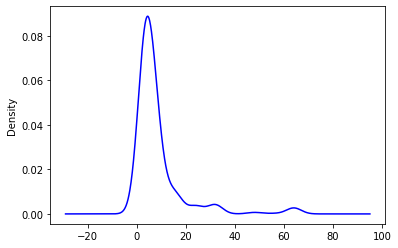

In [300]:
a=df.CPU_Core
a.plot(kind="kde",color="blue")

In [303]:
# df[df['Processor_Technology_for_CPU_Cores'].isna()]
df.isnull().sum()

Model                          0
Family                         0
Platform                       0
Launch_Date                    0
CPU_Core                       0
Threads                       59
Base_Clock_GHz                 0
Boost_Clock_GHz               80
L1_Cache                     256
L2_Cache                      65
L3_Cache                     206
Unlocked_for_Overclocking     94
Chip_lithography             102
CPU_Socket                    28
PCI_Express_Version          245
Default_TDP                   19
Maximum_core_temperature     136
System_Memory_Type            35
Graphics_Model                 0
dtype: int64

In [298]:

df.CPU_Core.isnull().sum()

4

#### 1st feature that have missing value is '#_of_CPU_Cores'

In [302]:
'''from sklearn.impute import SimpleImputer
s=SimpleImputer()
s.fit(df[["CPU_Core"]])
df.CPU_Core=s.transform(df[["CPU_Core"]])'''



In [ ]:

# Dropped all the NaN! values from '#_of_CPU_Cores' because these processor were very 
# old, the values are very critical and was not able to find the details for these Nan!

# df.dropna(subset=['#_of_CPU_Cores'], inplace= True)

#### 2nd Feature that have NaN! Values is '#_of_Threads'

In [ ]:
# df[df['#_of_Threads'].isna()]

In [ ]:
# We replaced the NaN by 0 because these processor doesn't have any threads 

# df['#_of_Threads'] = df['#_of_Threads'].fillna(0)

In [ ]:
# We converted these feature float to int because counting the cores and threads in float was not making sens

# df = df.astype({"#_of_CPU_Cores":'int', "#_of_Threads":'int'})

#### 3rd Feature that have NaN! Values is "Boost_Clock_GHz"

In [ ]:
# df = df.astype({"Boost_Clock_GHz":'str'})

In [ ]:
# df.Base_Clock_GHz = [i.replace('GHz', '') for i in df.Base_Clock_GHz]
# df.Boost_Clock_GHz = [i.replace('Up to ', '') for i in df.Boost_Clock_GHz]
# df.Boost_Clock_GHz = [i.replace('GHz', '') for i in df.Boost_Clock_GHz]

In [ ]:
# df = df.astype({"Base_Clock_GHz":'float', "Boost_Clock_GHz":'float'})

In [ ]:
# base_mean = (df["Boost_Clock_GHz"] - df.Base_Clock_GHz).mean()

In [ ]:
# boost_nan = df[df['Boost_Clock_GHz'].isna()]

In [ ]:
# boost_fill = base_mean + boost_nan.Base_Clock_GHz

In [ ]:
# df['Boost_Clock_GHz'] = df['Boost_Clock_GHz'].fillna(boost_fill)

#### 4th Feature that have NaN! Values is "'L1_Cache', 'L2_Cache','L3_Cache'" 

In [ ]:
# We filled the NaN of these three features with 0 beacause 
# we can count these three coloumn as one feature according 
# to this all the processors are having cache wether it is L1, L2 or L3

# df.update(df[['L1_Cache', 'L2_Cache','L3_Cache']].fillna(0))

#### 5th Feature that have NaN! Values is 'Unlocked_for_Overclocking'

In [ ]:
# df[df['Unlocked_for_Overclocking'].isna()].head()

In [ ]:
# I checked on google most of processor which is missing this feature 
# are not supporting overclocking that is why we replaced the nan with no
 
# df['Unlocked_for_Overclocking'] = df['Unlocked_for_Overclocking'].fillna('No')

In [ ]:
# df['Unlocked_for_Overclocking'].value_counts()

#### 6th Feature that have NaN! Values is 'Processor_Technology_for_CPU_Cores'

In [ ]:
# df.Model = [i.replace('™', '') for i in df.Model]
# df.Family = [i.replace('™', '') for i in df.Family]


In [ ]:
# amd_epyc = df.loc[df['Family'] == 'AMD EPYC']

In [ ]:
# amd_phenom = df.loc[df['Family'] == 'AMD Phenom']

In [ ]:
# amd_epyc.Model = [i.replace('AMD EPYC ', '') for i in amd_epyc.Model]

In [ ]:
# nanometers

In [304]:
df.shape

(583, 19)